_Подготовил: Виктор Кантор_

## Демонстрация к занятию 1. Текстовый классификатор за 5 минут

Выборка: SMSSpamCollection (http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/)
    
Цель: построить простой текстовый классификатор (в данном случае классы "спам" и "не спам")

Попробуйте угадать:
1. Сколько строк кода у нас займет всё вместе?
2. Сколько времени потребуется для написания кода вместе с кросс-валидацией?
3. Сколько времени для перебора всех основных алгоритмов классификации из sklearn на этой задаче?

Весь код ниже писался быстро, нигде не оптимально с эстетической точки зрения и с точки зрения времени выполнения, и в приличный вид не приводился. Однако единственное место, где это имело значение - чтение данных. Для работы с выборкой, кстати, тоже есть очень удобный питоновский пакет - pandas. Здесь он не использовался, но с ним можно довольно быстро познакомиться, если уже получается ориентироваться в стандартных типах и типах из numpy.

Итак, для начала зададим путь к файлу с выборкой. У меня он выглядел так:

In [10]:
data_path = "./"
!cd ../
!ls


01_DemoSpamFiltering.ipynb            test.csv
01_HealthCareDecisions_2ndPlace.ipynb train.csv
01_PandasTutorial.ipynb


Импортируем модуль с логистической регрессией (ей мы и будем классифицировать тексты) и с подсчетом по тексту частот слов, входящих в него (CountVectorizer). Сразу считаем всю выборку, чего, конечно, нельзя ни в коем случае делать, если она велика.

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer


input_file = open('./SMSSpamCollection.txt', 'r')
text = input_file.read()

In [97]:
isSpam = [int(line.split('\t')[0].replace('ham', '0').replace('spam','1')) for line in text.split('\n') if len(line) > 0]

In [99]:
print isSpam[:5]

[0, 0, 1, 0, 0]


Аналогично создаем список текстов смс-сообщений:

In [95]:
texts = [line.split('\t')[1] for line in text.split('\n') if len(line) > 0]

In [16]:
print len(texts)

5574


Теперь создадим экземпляр класса CountVectorizer и вызовем у него метод fit_transform, чтобы сразу и обучить словарь и вернуть матрицу признаков для текстов. Есть и раздельные методы fit() и transform() 

In [23]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)
type(vectorizer)
vectorizer.decode(doc)


NameError: name 'doc' is not defined

Интересно, какого типа полученная матрица. Ясно, что в одном тексте используется лишь небольшая часть словаря. Значит, в матрице будет много нулей. Хранить кучу нулей в памяти выглядит довольно странно, поэтому матрица записана в специальном формате для разреженных матриц.

Теперь посчитаем качество в кросс-валидации для разных классификаторов:

In [24]:
from sklearn.cross_validation import cross_val_score

In [25]:
import numpy as np

classifier = LogisticRegression()
print np.mean(cross_val_score(classifier, X, np.array(y), scoring="f1"))

0.925586303666


In [27]:
classifier.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [194]:
classifier.predict(vectorizer.transform(["FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! Subscribe6GB"]))

array([1])

Написание всего кода, вместе с пояснениями, заняло минуты. Чтобы прогнать на данных все подходящие модели из sklearn, уйдет немногим больше, чем суммарное время их работы. В этом плюсы быстрого прототипирования на Python с использованием доступных на нём пакетов. Есть множество столь же удобных инструментов и для гораздо более сложной работы с данными, чем в этом примере. Сейчас все это в нашем распоряжении, нужно только потратить силы на начальное изучение примеров и документации.

In [270]:
from pandas import *
spamcounter = {}
for i in range(0, len(texts)):
    for word in texts[i].lower().split():
        try:
            if (isSpam[i] == 1):
                spamcounter[word] += 1   
        except KeyError:
            if (isSpam[i] == 1):
                spamcounter[word] = 1
            else:
                spamcounter[word] = 0

sc = Series(spamcounter)
spamRate = {}
for i in range(0, len(texts)):
    spamRate[i] = 0
    for word in texts[i].lower().split():
        if sc.get(word) is not None:
            spamRate[i] = spamRate[i] + 1

srs = Series(spamRate)
print srs[:10]


0    11
1     2
2    28
3     7
4     6
5    32
6    13
7    15
8    26
9    29
dtype: int64


In [268]:
import pandas as pd #датафреймы
import numpy as np #массивы, линейная алгебра
import pylab as pl #графики
import matplotlib as mpl #графики
import sklearn
%matplotlib inline
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [272]:
srs.describe()

count    5574.000000
mean       11.019196
std         9.211619
min         0.000000
25%         4.000000
50%         8.000000
75%        15.750000
max       129.000000
dtype: float64

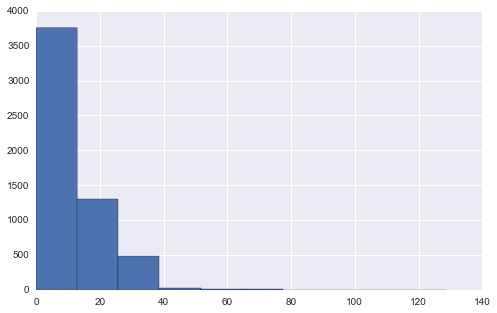

In [275]:
srs.hist(figsize=(8,5), bins=10);

ща прикрутим колонку с резалтами

In [314]:
iss = Series(isSpam)
data = pd.concat([srs, iss], axis=1)


In [317]:
data.columns = ["spamRate", "isSpam"]
print data

      spamRate  isSpam
0           11       0
1            2       0
2           28       1
3            7       0
4            6       0
5           32       1
6           13       0
7           15       0
8           26       1
9           29       1
10          14       0
11          26       1
12          26       1
13          26       0
14           6       0
15          19       1
16           1       0
17          11       0
18           6       0
19          24       1
20           5       0
21           7       0
22           6       0
23           8       0
24           7       0
25          14       0
26           2       0
27          23       0
28           8       0
29           4       0
...        ...     ...
5544         4       0
5545         4       0
5546        22       0
5547         9       0
5548         3       0
5549        28       1
5550         7       0
5551        10       0
5552         8       0
5553         6       0
5554         9       0
5555       

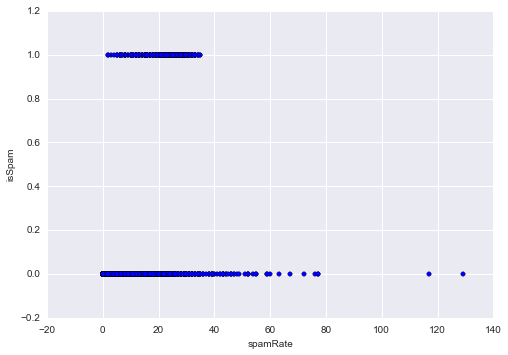

In [320]:
plt.scatter(data.spamRate, data.isSpam)
plt.xlabel('spamRate', size=10)
plt.ylabel('isSpam', size=10)